# To do list

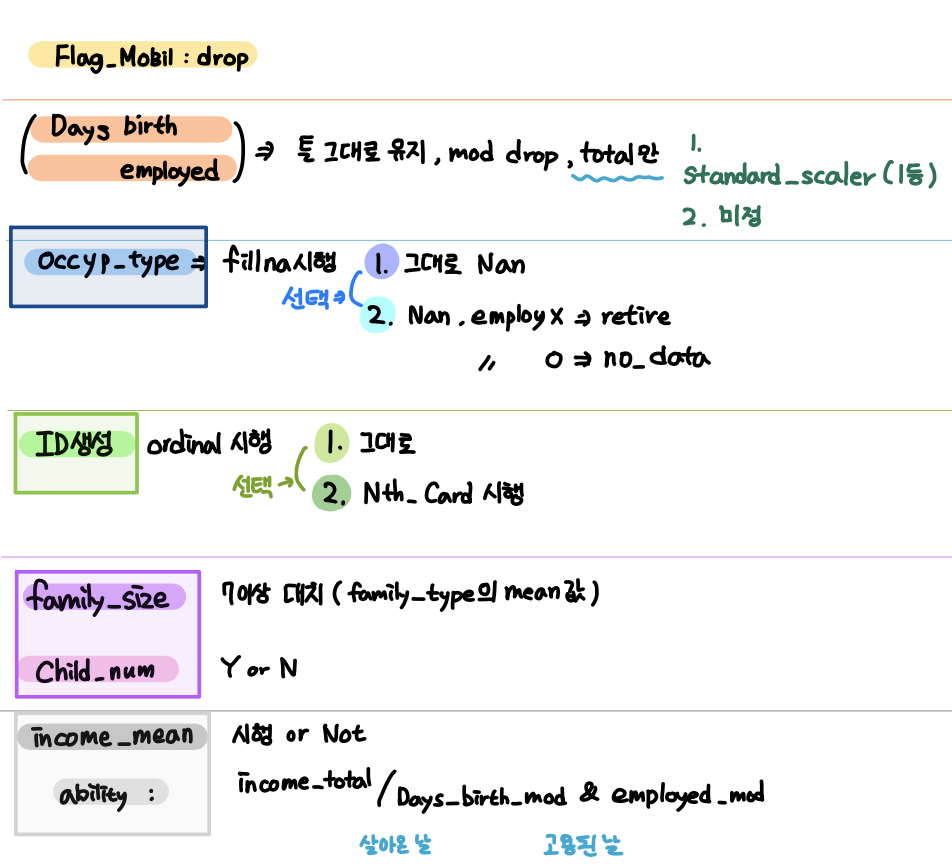

In [18]:
import IPython
url = 'https://user-images.githubusercontent.com/87803612/140495562-25ffe4e0-ab7f-4754-bdc7-9efd9d6433c6.png'
IPython.display.Image(url, width = 600)
# from PIL import Image
# import requests
# from io import BytesIO

# url = 'https://user-images.githubusercontent.com/87803612/140495562-25ffe4e0-ab7f-4754-bdc7-9efd9d6433c6.png'
# res = requests.get(url)
# request_get_img = Image.open(BytesIO(res.content))
# print('해야할 일')
# request_get_img

## 라이브러리 호출 및 데이터 불러오기

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import OrdinalEncoder
from tqdm import tqdm

In [104]:
path = 'data/'

train = pd.read_csv('{}train.csv'.format(path), index_col='index')
test = pd.read_csv('{}test.csv'.format(path), index_col='index')

# 1. Preprocessing

## FLAG_MOBIL drop

In [105]:
for dataset in [train,test]:
    dataset.drop(columns=['FLAG_MOBIL'], inplace=True)

## 나이, 고용연수

In [106]:
def year_month_total(df_1, df_2, column, column_name):
    """[나이, 고용연수 파생변수를 생성하기 위한 함수입니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        column ([생성할 컬럼의 기준 컬럼 명]): [생성할 컬럼의 기준 컬럼 명을 입력해주세요]
        column_name ([생성할 컬럼의 이름]): [연단위, 연+월단위로 표시된 파생변수 이름입니다.]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']
    
    # 입력한 컬럼이 DAYS_BIRTH인 경우 If로 처리
    
    if (column == 'DAYS_BIRTH') == True:    
        for dataset,name in zip(df_list,names):
            # MOD칼럼 형성 (원 데이터에 begin_month 빼주기)
            dataset['DAYS_BIRTH_MOD'] = dataset[column]-dataset['begin_month']*30
            dataset['{}_year'.format(column_name)] = dataset['DAYS_BIRTH_MOD'].abs()//365
            dataset['{}_month'.format(column_name)] = (dataset['DAYS_BIRTH_MOD'].abs()%365)//30
            dataset['{}_total'.format(column_name)] = dataset['{}_year'.format(column_name)] + round(dataset['{}_month'.format(column_name)] * (1/12), 2)
            # 불필요한 칼럼 삭제
            dataset.drop(columns=[f'{column_name}_month', f'{column_name}_year'], inplace=True)
            # 출력 결과 print        
            print('{0}set에 {1}_total, {2} 컬럼을 생성하였습니다. \n'.format(name,column_name,'DAYS_BIRTH_MOD'))
    
    # 입력한 컬럼이 DAYS_EMPLOYED인 경우 else로 처리 (occyp_type 처리를 위한 작업이므로 1번째로 수행)
    
    else:
        for dataset,name in zip(df_list,names):
            # MOD칼럼 형성 (원 데이터에 begin_month 빼주기)            
            dataset['DAYS_EMPLOYED_MOD'] = dataset['DAYS_EMPLOYED']-dataset['begin_month']*30
            print('{}set에 근무일자가 잘못기입된 '.format(name) +
                  '\033[96m' + '{} cases'.format(len(dataset[dataset['DAYS_EMPLOYED_MOD']>=0])) + 
                  '\033[0m' + '에 대한 처리를 시작합니다.')
            # Begin_month 처리한 사람들 대상 (카드를 생성한 시점에 무직일 확률이 높은 사람들 + 애초에 무직)
            dataset.loc[(dataset['DAYS_EMPLOYED_MOD']>0), 'DAYS_EMPLOYED_MOD'] = 0
            a = len(dataset.loc[(dataset['DAYS_EMPLOYED_MOD']==0)])
            # Emplyed 시간이 애초에 없는 사람 대상 (애초에 무직)
            dataset['DAYS_EMPLOYED'] = dataset['DAYS_EMPLOYED'].replace(365243, 0)
            b = len(dataset.loc[(dataset['DAYS_EMPLOYED']==0)])
            print('\033[92m'+'원래 무직인 사람들의 수 : {}'.format(b))
            print('카드를 생성한 시점에 무직일 확률일 높은 사람들 : {}'.format(a-b) + '\033[0m')
            dataset['{}_year'.format(column_name)] = dataset['DAYS_EMPLOYED_MOD'].abs()//365
            dataset['{}_month'.format(column_name)] = (dataset['DAYS_EMPLOYED_MOD'].abs()%365)//30
            dataset['{}_total'.format(column_name)] = dataset['{}_year'.format(column_name)] + round(dataset['{}_month'.format(column_name)] * (1/12), 2)
            # 불필요한 칼럼 삭제
            dataset.drop(columns=[f'{column_name}_month', f'{column_name}_year'], inplace=True)
            # 출력 결과 print
            print('{0}set에 {1}_total, {2} 컬럼을 생성하였습니다. \n'.format(name,column_name,'DAYS_BIRTH_MOD'))

        
    del df_list,names
    return dataset.head(1)

In [107]:
year_month_total(train, test, 'DAYS_BIRTH', 'year')

trainset에 year_total, DAYS_BIRTH_MOD 컬럼을 생성하였습니다. 

testset에 year_total, DAYS_BIRTH_MOD 컬럼을 생성하였습니다. 



,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,DAYS_BIRTH_MOD,year_total
index,,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,0,1,0,NaN,2.0,-60.0,-20190.0,55.25


In [108]:
year_month_total(train, test, 'DAYS_EMPLOYED', 'work')

trainset에 근무일자가 잘못기입된 8357 cases에 대한 처리를 시작합니다.
원래 무직인 사람들의 수 : 4438
카드를 생성한 시점에 무직일 확률일 높은 사람들 : 3919
trainset에 work_total, DAYS_BIRTH_MOD 컬럼을 생성하였습니다. 

testset에 근무일자가 잘못기입된 3169 cases에 대한 처리를 시작합니다.
원래 무직인 사람들의 수 : 1697
카드를 생성한 시점에 무직일 확률일 높은 사람들 : 1472
testset에 work_total, DAYS_BIRTH_MOD 컬럼을 생성하였습니다. 



,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,DAYS_BIRTH_MOD,year_total,DAYS_EMPLOYED_MOD,work_total
index,,,,,,,,,,,,,,,,,,,,,
26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,...,0,1,0,NaN,2.0,-60.0,-20190.0,55.25,0.0,0.0


## 직업 column 처리
두가지 case를 적용해볼 것임. 

1. fillna('Nan')으로 대치하고 전처리 종료
2. Nan인 사람 중 employed기간이 0인 사람은 retire, 아닌 사람은 no_data 처리

    11/05 금요일에 시행한 것은 1번으로 fillna('Nan')

In [109]:
# 1st
for dataset in (train, test):
    dataset['occyp_type'] = dataset['occyp_type'].fillna('Nan')

In [110]:
# 2nd

def occyp_type_nan(df_1, df_2):
    """[직업 컬럼 내의 Nan 값을 처리합니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']

    # 무직자 처리 함수
    
    for dataset,name in zip(df_list,names):
        dataset['occyp_type'] = dataset['occyp_type'].fillna('Nan')
        
        print('직업 컬럼의 ' +
              '\033[92m' + 'Nan value {}명 중 '.format(len(dataset.loc[dataset['occyp_type'] == 'Nan'])) +
              '\033[96m' + '{}명이 실제 고용일수가 0일입니다. '.format(len(dataset.loc[(dataset['occyp_type'] == 'Nan') & (dataset['DAYS_EMPLOYED'] == 0)])) + 
              '\033[0m'+ '따라서 retired로 처리합니다.')
        
        dataset.loc[(dataset['occyp_type'] == 'Nan') & (dataset['DAYS_EMPLOYED'] == 0), 'occyp_type'] = 'retired'
        
        # 무직자는 아니지만 데이터가 없는 경우
        
        print('나머지 {}명 데이터는 no_data로 처리합니다.'.format(len(dataset.loc[dataset['occyp_type'] == 'Nan'])))
        
        dataset.loc[dataset['occyp_type'] == 'Nan', 'occyp_type'] = 'no_data'
        
        print('{}set의 직업 Nan value를 처리하였습니다.\n'.format(name))
        
    del df_list, names
    return dataset.head(1)

# occyp_type_nan(train, test)

## ID 생성
ID를 생성하고 ordinalencoder를 시행하는 것 까지는 동일

1. Nth_card를 적용하지 않는 것
2. Nth_card를 적용하는 것

    11/05에 시행하는 것은 1번째임

In [111]:
#1st
def ID_col_1st(df_1, df_2):
    """[데이터 셋 전처리 함수입니다.]

    Args:
        df_1 ([Dataset]): [train 데이터셋을 입력해주세요]
        df_2 ([Dataset]): [test 데이터셋을 입력해주세요]
    """
    
    # 변수 설정
     
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    a = []
    change_credit = 0
    names = ['train', 'test']

    # ID 생성
    
    for name, dataset, in zip(names, df_list):
    # for dataset in df_list:
        dataset['ID'] = dataset['gender'].astype(str) +'.'+ dataset['car'].astype(str)+'.' + dataset['reality'].astype(str)+'.' + \
                dataset['child_num'].astype(str)+'.' + dataset['income_total'].astype(str) +'.'+ dataset['income_type'].astype(str) +'.'+ \
                dataset['edu_type'].astype(str)+'.' + dataset['family_type'].astype(str)+'.' + dataset['house_type'].astype(str) +'.'+ \
                dataset['DAYS_BIRTH'].astype(str) +'.'+ dataset['DAYS_EMPLOYED'].astype(str) +'.'+ dataset['work_phone'].astype(str) +'.'+ \
                dataset['phone'].astype(str) +'.'+ dataset['email'].astype(str) +'.' + dataset['family_size'].astype(str)+'.' + dataset['occyp_type'].astype(str)
        
        dataset = dataset.sort_values(['ID','begin_month'], ascending=[True, False])
        dataset.reset_index(inplace=True)
        dataset.drop(columns={'index'}, inplace=True)

        # OrdinalEncoder로 ID 변환
        
        print('\033[96m' + '해당 Data 내의 고유 ID 수는 {}입니다. '.format(dataset['ID'].nunique()) + 
              '\033[0m' + 'OrdinalEncoder를 이용힌 변환을 시작합니다.')
        
        encode = OrdinalEncoder()
        dataset['ID'] = encode.fit_transform(dataset[['ID']])
        
        # dataset 저장부분
        
        print('dataset(ID_list_{})을 저장합니다. \n'.format(name))    
        dataset.to_csv('{}ID_list_1st_{}.csv'.format(path, name))
        
    
    del names, a
    return dataset.head(5)

In [112]:
def ID_col_2nd(df_1, df_2):
    """[데이터 셋 전처리 함수입니다.]

    Args:
        df_1 ([Dataset]): [train 데이터셋을 입력해주세요]
        df_2 ([Dataset]): [test 데이터셋을 입력해주세요]
    """
    
    # 변수 설정
     
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    a = []
    change_credit = 0
    names = ['train', 'test']

    # ID 생성
    
    for name, dataset, in zip(names, df_list):
    # for dataset in df_list:
        dataset['ID'] = dataset['gender'].astype(str) +'.'+ dataset['car'].astype(str)+'.' + dataset['reality'].astype(str)+'.' + \
                dataset['child_num'].astype(str)+'.' + dataset['income_total'].astype(str) +'.'+ dataset['income_type'].astype(str) +'.'+ \
                dataset['edu_type'].astype(str)+'.' + dataset['family_type'].astype(str)+'.' + dataset['house_type'].astype(str) +'.'+ \
                dataset['DAYS_BIRTH'].astype(str) +'.'+ dataset['DAYS_EMPLOYED'].astype(str) +'.'+ dataset['work_phone'].astype(str) +'.'+ \
                dataset['phone'].astype(str) +'.'+ dataset['email'].astype(str) +'.' + dataset['family_size'].astype(str)+'.' + dataset['occyp_type'].astype(str)
        
        dataset = dataset.sort_values(['ID','begin_month'], ascending=[True, False])
        dataset.reset_index(inplace=True)
        dataset.drop(columns={'index'}, inplace=True)

        # OrdinalEncoder로 ID 변환
        
        print('\033[96m' + '해당 Data 내의 고유 ID 수는 {}입니다. '.format(dataset['ID'].nunique()) + 
              '\033[0m' + 'OrdinalEncoder를 이용힌 변환을 시작합니다.')
        encode = OrdinalEncoder()
        dataset[['ID']] = encode.fit_transform(dataset[['ID']])

        # Nth_card 컬럼 추가 (ID가 같은데 카드 개수가 여러 개인 사람을 대상으로 몇 번째 카드를 만들었는지 생성해준다)
        
        print('Column(Nth_card)을 생성합니다.')
        for i in tqdm(range(dataset['ID'].nunique())):
            Nth_card = len(dataset[dataset['ID']==i]) + 1
            
            while Nth_card > 0:
                Nth_card = Nth_card -1
                a.append(Nth_card)
                if Nth_card == 1:
                    break
                
        dataset['Nth_card'] = a        
        a.clear()
        print('\033[92m' + '신규로 카드를 개설한 사람의 수 : {}'.format(dataset[dataset['begin_month']==0.0]['ID'].nunique()) +
              '\033[0m')
        
        # Credit이 좋아지지 않고 악화된 경우를 체크하는 부분 (begin_month기준으로 Nth_card를 추가해줬으므로 인덱스 값을 기준으로 시행한다.)
        
        if (dataset['ID'].nunique() > 8000)==True:
            print('credit 정보를 확인하고 시간이 지나며 credit이 악화된 사례가 있는지 확인합니다.')
            for i in tqdm(range(dataset['ID'].nunique())):
                num = dataset.loc[dataset['ID'] == i]['credit'].to_list()
                for j in range(len(num)-1):
                    if (num[j] <= num[j+1]) == True:
                        pass
                    else :
                        change_credit += 1
                        break
            print('\033[96m'+'{}명 (전체 인원 중 {:.2f}%)은 credit이 개선되지 않고 악화된 사례가 존재합니다.'.format(change_credit, 
                                                                        (change_credit/dataset['ID'].nunique())*100) + 
                  '\033[0m')  
        else:
            print('\033[96m' + 'credit 정보가 없는 testset입니다.' + 
                  '\033[0m')
        
        # dataset 저장부분
        
        print('dataset(ID_list_{})을 저장합니다. \n'.format(name))    
        dataset.to_csv('{}ID_list_2nd_{}.csv'.format(path, name))
        
    
    del names, a
    return dataset.head(5)

In [113]:
# 1st
ID_col_1st(train,test)

해당 Data 내의 고유 ID 수는 8759입니다. OrdinalEncoder를 이용힌 변환을 시작합니다.
dataset(ID_list_train)을 저장합니다. 

해당 Data 내의 고유 ID 수는 5585입니다. OrdinalEncoder를 이용힌 변환을 시작합니다.
dataset(ID_list_test)을 저장합니다. 



,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,DAYS_BIRTH_MOD,year_total,DAYS_EMPLOYED_MOD,work_total,ID
0,F,N,N,0,103500.0,Pensioner,Higher education,Married,House / apartment,-21701,...,1,0,Nan,2.0,-3.0,-21611.0,59.17,0.0,0.0,0.0
1,F,N,N,0,103500.0,Pensioner,Higher education,Married,House / apartment,-21701,...,1,0,Nan,2.0,-46.0,-20321.0,55.67,0.0,0.0,0.0
2,F,N,N,0,103500.0,Pensioner,Higher education,Married,House / apartment,-21701,...,1,0,Nan,2.0,-53.0,-20111.0,55.08,0.0,0.0,0.0
3,F,N,N,0,103500.0,Pensioner,Higher education,Single / not married,House / apartment,-24543,...,0,0,Nan,1.0,-28.0,-23703.0,64.92,0.0,0.0,1.0
4,F,N,N,0,103500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-20123,...,0,0,Nan,2.0,-11.0,-19793.0,54.17,0.0,0.0,2.0


In [114]:
## 2nd
# ID_col_2nd(train, test)

In [115]:
_1or2 = '1st'
train = pd.read_csv('{}ID_list_{}_train.csv'.format(path,_1or2))
test = pd.read_csv('{}ID_list_{}_test.csv'.format(path,_1or2))

for df in (train,test):
    df.drop(columns=['Unnamed: 0'], inplace =True)

## Famliy size 조정 및 child_num 대치

In [116]:
def replace_value_family(df_1, df_2, num_of_outlier):
    """[Family_size의 outlier를 대치해주는 작업을 시행합니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        num_of_outlier ([outlier_standard]): [family_size의 outlier 기준을 입력하세요]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']

    # family_size Outlier를 처리하는 작업
    
    for dataset,name in zip(df_list,names):
        
        print('child_num의 value를 자식 유무로 바꿉니다.')
        
        dataset.loc[(dataset['child_num']>0), 'child_num'] = 1
        dataset.loc[(dataset['child_num']==0), 'child_num'] = 0
        print('\033[96m' + '자녀가 있는 사람의 수 : {}'.format(dataset['child_num'].value_counts()[1]), 
              '\033[0m')
        print('\033[96m' + '자녀가 없는 사람의 수 : {}'.format(dataset['child_num'].value_counts()[0]), 
              '\033[0m')
        
        print('\033[96m' + 'family_size {}명 이상인 사람의 수 : {}'.format(num_of_outlier, 
                                                                      len(dataset.loc[dataset['family_size'] >= num_of_outlier])) +
              '\033[0m')
        
        sub = dataset.loc[dataset['family_size']>= num_of_outlier]
        
        for i in tqdm(range(len(sub))):
        
            a = int(dataset[dataset['family_type'] == sub['family_type'].values[i]].mean()['family_size'])
            
            dataset.loc[(dataset['family_size']>= num_of_outlier), 'family_size'] = a
        
        # 잘 처리되었는지 확인하는 부분
        
        print('\033[96m' + 'family_size {}명 이상인 사람의 수 : {}'.format(num_of_outlier, 
                                                        len(dataset.loc[dataset['family_size'] >= num_of_outlier]))+
              '\033[0m')
        
        print('{} 데이터 셋 처리 완료.\n'.format(name))
    
    del sub,df_list, names
    return dataset.head(1)

replace_value_family(train, test, 7)

child_num의 value를 자식 유무로 바꿉니다.
자녀가 있는 사람의 수 : 8117 
자녀가 없는 사람의 수 : 18340 
family_size 7명 이상인 사람의 수 : 15


100%|██████████| 15/15 [00:08<00:00,  1.78it/s]


family_size 7명 이상인 사람의 수 : 0
train 데이터 셋 처리 완료.

child_num의 value를 자식 유무로 바꿉니다.
자녀가 있는 사람의 수 : 3139 
자녀가 없는 사람의 수 : 6861 
family_size 7명 이상인 사람의 수 : 10


100%|██████████| 10/10 [00:01<00:00,  8.08it/s]

family_size 7명 이상인 사람의 수 : 0
test 데이터 셋 처리 완료.



,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,DAYS_BIRTH_MOD,year_total,DAYS_EMPLOYED_MOD,work_total,ID
0,F,N,N,0,103500.0,Pensioner,Higher education,Married,House / apartment,-21701,...,1,0,Nan,2.0,-3.0,-21611.0,59.17,0.0,0.0,0.0


## income_mean
  
1. 시행한다. 
2. 시행하지 않는다.

    11/05 시행해봄

In [122]:
# 1st
def income_mean(df_1, df_2):
    """[1인당 평균소득을 추가합니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']
    
    for dataset,name in zip(df_list,names):
       print('1인당 소득으로 소득 수준을 조정합니다.')
       dataset['income_mean'] = dataset['income_total'] / dataset['family_size']
       print('{} 데이터 셋 처리 완료.\n'.format(name))

In [118]:
income_mean(train,test)

1인당 소득으로 소득 수준을 조정합니다.
train 데이터 셋 처리 완료.

1인당 소득으로 소득 수준을 조정합니다.
test 데이터 셋 처리 완료.



## ability 변수 추가

In [123]:
def ability(df_1, df_2):
    """[능력 변수를 추가합니다.]

    Args:
        df_1 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
        df_2 ([DataFrame]): [데이터 프레임 이름을 입력해주세요]
    """
    # 변수 설정
    
    df_list = []
    df_list.append(df_1)
    df_list.append(df_2)
    names = ['train', 'test']
    
    for dataset,name in zip(df_list,names):
       dataset['ability'] = dataset['income_total'] / abs(dataset['DAYS_EMPLOYED_MOD'] + (dataset['DAYS_BIRTH_MOD']))
       print('{} 데이터 셋 처리 완료.\n'.format(name))
    
    return dataset.head(1)
ability(train, test)

train 데이터 셋 처리 완료.

test 데이터 셋 처리 완료.



,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,occyp_type,family_size,begin_month,DAYS_BIRTH_MOD,year_total,DAYS_EMPLOYED_MOD,work_total,ID,income_mean,ability
0,F,N,N,0,103500.0,Pensioner,Higher education,Married,House / apartment,-21701,...,Nan,2.0,-3.0,-21611.0,59.17,0.0,0.0,0.0,51750.0,4.789228


In [126]:
names = ['train', 'test']

for name,dataset in zip(names, [train, test]):
    dataset.to_csv('{}FullChange_{}.csv'.format(path,name))

# 인코딩 시행